# Ch3: Geometry & Algebra of Tensors¶

## 3.2 Multilinear Algebra

### adopted from https://stackoverflow.com/questions/43624502/using-python-to-calculate-the-unique-conic-section-using-five-points


In [299]:
import sys
import numpy as np

def classify_conic(A, B, C, D, E, F):
    '''
    Solve for the coefficients of a conic given five points in Numpy array

    `points` should have at least five rows.

    `f` is the constant that you can specify. With the returned solution,
    `(a, b, c, d, e, f)`, the full conic is specified as:

    $a x^2 + b x y + c y^2 + d x + e y = -f$
    
    If `points` has exactly five rows, the equation will be exact. If `points`
    has *more* than five rows, the solution will be a least-squares one that
    fits the data the best.
    '''
    Q = np.array( ((A, B/2, D/2), (B/2, C, E/2), (D/2, E/2, F)) )
    Q = np.matrix(Q)
    Q33 = Q[:2,:2]

    detQ = np.linalg.det(Q)
    detQ33 = np.linalg.det(Q33)
    if detQ == 0:
        if detQ33 < 0:
            return 'two intersecting lines'
        if detQ33 == 0:
            return 'two parallel lines'
        return 'a single point'

    if detQ33 < 0:
        return 'a hyperbola'
    if detQ33 == 0:
        return 'a parabola'
    if A == C and B == 0:
        return 'a circle'
    return 'an ellipse'

from numpy.linalg import lstsq

## try with different points to check the different results

points = np.array([[-2, 4],
[-1, 1],
[0, 0],
[1, 1],
[2, 4]])

x = points[:, 0]
y = points[:, 1]

f=1.0
A = np.vstack([x**2, x * y, y**2, x, y]).T
fullSolution = lstsq(A, f * np.ones(x.size))
(a, b, c, d, e) = fullSolution[0]
    

print(classify_conic(a, b, c, d, e, f))

a hyperbola


C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_20496/3138522601.py:53: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fullSolution = lstsq(A, f * np.ones(x.size))


In [296]:
X = np.array([[-2, 4],
[1, 1],
[0, 0]])
for arg in X[:]:
    print (arg)

[-2  4]
[1 1]
[0 0]


### 3.2.2.2 Differential Geometry on Manifolds

Adopted From:
https://docs.sympy.org/latest/modules/diffgeom.html
http://omz-software.com/pythonista/sympy/modules/diffgeom.html


## Define boilerplate Manifold, Patch and coordinate systems:

In [72]:
from sympy.diffgeom import Manifold, Patch, CoordSystem
m = Manifold('M', 2)
m

M

In [73]:
m = Manifold('M', 2)
p = Patch('P', m)
p

P

In [74]:
from sympy import symbols, pi, sqrt, atan2, cos, sin

m = Manifold('M', 2)
p = Patch('P', m)
x, y = symbols('x y', real=True)
r, theta = symbols('r theta', nonnegative=True)
# rect is also called Car2D after Rene Descartes.every point on the plane can be identified by unique x and y coordinates, 
# Polar is , some appreviations used in this package is p such as is R2_p
relation_dict = { ('rect', 'pol'): [(x, y), (sqrt(x**2 + y**2), atan2(y, x))], ('pol', 'rect'): [(r, theta), (r*cos(theta), r*sin(theta))] } 
relation_dict

{('rect', 'pol'): [(x, y), (sqrt(x**2 + y**2), atan2(y, x))],
 ('pol', 'rect'): [(r, theta), (r*cos(theta), r*sin(theta))]}

In [4]:
Rect = CoordSystem('rect', p, (x, y), relation_dict)
Polar = CoordSystem('pol', p, (r, theta), relation_dict)
Rect

rect

In [5]:
Polar

pol

In [6]:
Rect.transformation(Polar)

Lambda((x, y), Matrix([
[sqrt(x**2 + y**2)],
[      atan2(y, x)]]))

In [7]:
Polar.transformation(Rect)

Lambda((r, theta), Matrix([
[r*cos(theta)],
[r*sin(theta)]]))

In [8]:
Rect.transform(Polar)

Matrix([
[sqrt(x**2 + y**2)],
[      atan2(y, x)]])

In [9]:
# Push-forward : of a vector moves it from one manifold to another or the same manifold with a different coordinate system. 
# This is often called tangent mapping. 
Rect.transform(Polar, [1, 2])

Matrix([
[sqrt(5)],
[atan(2)]])

In [10]:
Polar.jacobian(Rect)

Matrix([
[cos(theta), -r*sin(theta)],
[sin(theta),  r*cos(theta)]])

In [11]:
Polar.jacobian(Rect, [r, theta])

Matrix([
[cos(theta), -r*sin(theta)],
[sin(theta),  r*cos(theta)]])

In [12]:
Polar.jacobian(Rect, [1, pi/2])

Matrix([
[0, -1],
[1,  0]])

In [13]:
Rect.jacobian_determinant(Polar)

1/sqrt(x**2 + y**2)

In [14]:
Rect.jacobian_determinant(Polar, [1,0])

1

In [15]:
Polar.connect_to(Rect, [r, theta], [r*cos(theta), r*sin(theta)])
Polar.coord_tuple_transform_to(Rect, [0, 2])

C:\ProgramData\Anaconda3\lib\site-packages\sympy\diffgeom\diffgeom.py:508: SymPyDeprecationWarning: 

CoordSystem.connect_to has been deprecated since SymPy 1.7. Use new
instance generated with new 'transforms' parameter instead. See
https://github.com/sympy/sympy/issues/19321 for more info.

  SymPyDeprecationWarning(
C:\ProgramData\Anaconda3\lib\site-packages\sympy\diffgeom\diffgeom.py:585: SymPyDeprecationWarning: 

CoordSystem.coord_tuple_transform_to has been deprecated since SymPy
1.7. Use CoordSystem.transform instead. See
https://github.com/sympy/sympy/issues/19321 for more info.

  SymPyDeprecationWarning(
C:\ProgramData\Anaconda3\lib\site-packages\sympy\diffgeom\diffgeom.py:2230: SymPyDeprecationWarning: 

Mutable CoordSystem.transforms has been deprecated since SymPy 1.7.
Use 'relations' parameter in class signature instead. See
https://github.com/sympy/sympy/issues/19321 for more info.

  SymPyDeprecationWarning(


Matrix([
[0],
[0]])

In [16]:
Polar.coord_tuple_transform_to(Rect, [2, pi/2])

Matrix([
[0],
[2]])

In [17]:
Rect.coord_tuple_transform_to(Polar, [1, 1])

Matrix([
[(-2 + sqrt(2))/(1 - sqrt(2))],
[                        pi/4]])

In [18]:
#Define a point using coordinates in one of the coordinate systems:
p = Polar.point([1, 3*pi/4])
p

Point(pol, Matrix([
[     1],
[3*pi/4]]))

In [19]:
Rect.point_to_coords(p)

Matrix([
[-sqrt(2)/2],
[ sqrt(2)/2]])

In [20]:
Polar.jacobian(Rect, [r, theta])

Matrix([
[cos(theta), -r*sin(theta)],
[sin(theta),  r*cos(theta)]])

## Define a basis scalar field (i.e. a coordinate function), that takes a point and returns its coordinates. It is an instance of BaseScalarField.

In [21]:
Rect.coord_function(0)(p)

-sqrt(2)/2

In [22]:
Rect.coord_function(1)(p)

sqrt(2)/2

## Define a basis vector field (i.e. a unit vector field along the coordinate line). Vectors are also differential operators on scalar fields. It is an instance of BaseVectorField.

In [23]:
v_x = Rect.base_vector(0)
v_x

e_x

In [24]:
x = Rect.coord_function(0)
x

x

In [25]:
 v_x(x)

1

In [26]:
 v_x(v_x(x))

0

## Define a basis oneform field:

In [27]:
dx = Rect.base_oneform(0)
dx

dx

In [28]:
dx(v_x)

1

In [327]:
# Pull-back of a differential form moves it from one manifold to another manifold or the same manifold with a different coordinate system. 
# This is often cotangent mapping D_p^* f, and is dual to the push-back of vectors. 

# This is not defined, and discussed with an attempt in https://github.com/sympy/sympy/issues/17202  

## If you provide a list of names the fields will print nicely: - without provided names:

In [29]:
x, v_x, dx

(x, e_x, dx)

## with provided names

In [30]:
Rect.coord_function(0), Rect.base_vector(0), Rect.base_oneform(0)

(x, e_x, dx)

## Examples of fields:

In [31]:
from sympy.diffgeom import BaseScalarField

fx = BaseScalarField(Rect, 0)
fx

x

In [32]:
fy = BaseScalarField(Rect, 1)
fy

y

In [33]:
(fx**2+fy**2).rcall(p) # rcall apply the object calling it on the argument recursively through the expression tree.

1

In [34]:
from sympy import Function

g = Function('g')
g

g

In [35]:
ftheta = BaseScalarField(Polar, 1)
ftheta

theta

In [36]:
fg = g(ftheta-pi)
fg

g(theta - pi)

In [37]:
fg.rcall(p)

g(-pi/4)

In [39]:
from sympy.diffgeom.rn import R2, R2_p, R2_r 
# Predefined R^n manifolds together with common coord. systems & their transformations, p for polar, r for rectangular, c for cylindrical, s for spherical 
from sympy.diffgeom import BaseVectorField
from sympy import pprint

x0, y0, r0, theta0 = symbols('x0, y0, r0, theta0')

## Points to be used as arguments for the field:

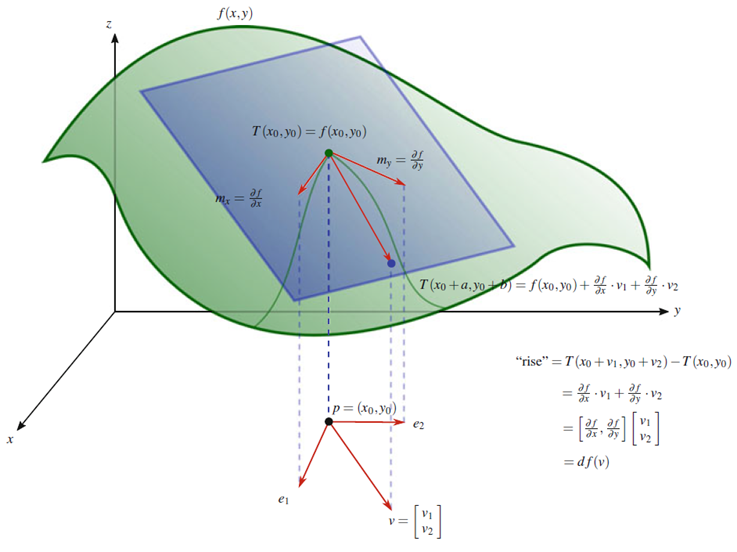

### The differential dfp takes a vector vp at some point p in Manifold R^2 and produces a number which is the rise of the tangent plane to the graph of the function as it moves from p along the vector vp. The illustration shows the projection on the tangent space and its equivalence with the basis coordinates at the bottom 

### Fortney, J.P. (2018) A Visual Introduction to Differential Forms and Calculus on Manifolds. Cham: Springer International Publishing. Available at: https://doi.org/10.1007/978-3-319-96992-3.

In [154]:
p = R2_r.point([x0, y0])
p

Point(rectangular, Matrix([
[x0],
[y0]]))

In [155]:
point_p = R2_p.point([r0, theta0])
point_p

Point(polar, Matrix([
[    r0],
[theta0]]))

In [156]:
f = Function('f')
s_field = f(R2.x, R2.y)
s_field

f(x, y)

In [157]:
f(p)

f(Point(rectangular, Matrix([
[x0],
[y0]])))

In [158]:
point_r = R2_r.point([x0, y0])
point_r

Point(rectangular, Matrix([
[x0],
[y0]]))

In [159]:
s_field.rcall(point_r)

f(x0, y0)

In [160]:
s_field.rcall(point_p)

f(r0*cos(theta0), r0*sin(theta0))

In [173]:
v1 = BaseVectorField(R2_r, 0)
v1

e_x

In [174]:
v2 = BaseVectorField(R2_r, 1)
v2

e_y

In [162]:
pprint(v(s_field))

⎛d          ⎞│   
⎜──(f(x, ξ))⎟│   
⎝dξ         ⎠│ξ=y


In [163]:
pprint(v(s_field).rcall(point_r).doit())

 ∂            
───(f(x₀, y₀))
∂y₀           


In [164]:
pprint(v(s_field).rcall(point_p).doit())

⎛∂                   ⎞│            
⎜──(f(r₀⋅cos(θ₀), ξ))⎟│            
⎝∂ξ                  ⎠│ξ=r₀⋅sin(θ₀)


In [165]:
from sympy.diffgeom import Differential
    
e_x, e_y, = R2.e_x, R2.e_y
e_x

e_x

In [166]:
e_y

e_y

In [168]:
df = Differential(s_field)
df

d(f(x, y))

In [169]:
pprint(df(e_x))

⎛d          ⎞│   
⎜──(f(ξ, y))⎟│   
⎝dξ         ⎠│ξ=x


In [170]:
pprint(df(e_y))

⎛d          ⎞│   
⎜──(f(x, ξ))⎟│   
⎝dξ         ⎠│ξ=y


In [171]:
Differential(df)

0

In [175]:
df(v1)

Subs(Derivative(f(_xi, y), _xi), _xi, x)

In [176]:
df(v2)

Subs(Derivative(f(x, _xi), _xi), _xi, y)

In [177]:
from sympy.diffgeom import WedgeProduct

WedgeProduct(R2.dx, R2.dy)(R2.e_x, R2.e_y)

1

In [178]:
WedgeProduct(R2.dx, R2.dy)(R2.e_y, R2.e_x)

-1

In [179]:
WedgeProduct(R2.dx, R2.x*R2.dy)(R2.x*R2.e_x, R2.e_y)

x**2

In [65]:
from sympy.diffgeom import BaseCovarDerivativeOp ## Covariant derivative operator wrt a base vector.
from sympy.diffgeom import metric_to_Christoffel_2nd, TensorProduct

TP = TensorProduct
ch = metric_to_Christoffel_2nd(TP(R2.dx, R2.dx) + TP(R2.dy, R2.dy))
ch

[[[0, 0], [0, 0]], [[0, 0], [0, 0]]]

In [66]:
cvd = BaseCovarDerivativeOp(R2_r, 0, ch)
cvd

BaseCovarDerivativeOp(rectangular, 0, [[[0, 0], [0, 0]], [[0, 0], [0, 0]]])

In [67]:
 cvd(R2.x)

1

In [68]:
cvd(R2.x*R2.e_x)

e_x

In [69]:
from sympy.diffgeom import CovarDerivativeOp ## Covariant derivative operator.

cvd = CovarDerivativeOp(R2.x*R2.e_x, ch)
cvd

CovarDerivativeOp(x*e_x, [[[0, 0], [0, 0]], [[0, 0], [0, 0]]])

In [70]:
cvd(R2.x)

x

In [71]:
cvd(R2.x*R2.e_x)

x*e_x

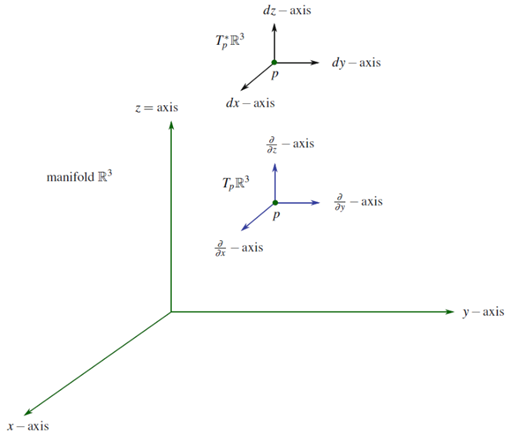

### An illustration of the manifold $ R^3 $  along with the tangent space $T_pR^3$ “attached” to the manifold at point p. The dual space $T_p ^* R^3 $ is drawn above the tangent space which it is dual to. Notice the different ways the axis are labelled 


### Fortney, J.P. (2018) A Visual Introduction to Differential Forms and Calculus on Manifolds. Cham: Springer International Publishing. Available at: https://doi.org/10.1007/978-3-319-96992-3.

In [196]:
from sympy.diffgeom.rn import R3, R3_r

x, y, z = symbols('x, y, z')
p = R3_r.point([x, y, z])
p

Point(rectangular, Matrix([
[x],
[y],
[z]]))

In [197]:
R3_r.coord_function(0)(p)

x

In [198]:
R3_r.coord_function(1)(p)

y

In [199]:
R3_r.coord_function(2)(p)

z

## Define a basis vector field (i.e. a unit vector field along the coordinate line). Vectors are also differential operators on scalar fields. It is an instance of BaseVectorField.

In [200]:
v_x = R3_r.base_vector(0)
v_x


e_x

## Define a basis oneform field:

In [201]:
dx = R3_r.base_oneform(0)
dx

dx

In [202]:
pprint (R3_r.coord_function(0) + R3_r.base_vector(0) + R3_r.base_oneform(0)) # the three x coordinate system from the rectangular, to the Tangent space, to the dual Space

x + ∂ₓ + ⅆ x


In [203]:
pprint (R3_r.coord_function(1) + R3_r.base_vector(1) + R3_r.base_oneform(1)) # same for y

y + ∂_y + ⅆ y


In [204]:
pprint (R3_r.coord_function(2) + R3_r.base_vector(2) + R3_r.base_oneform(2)) # same for z

z + ∂_z + ⅆ z


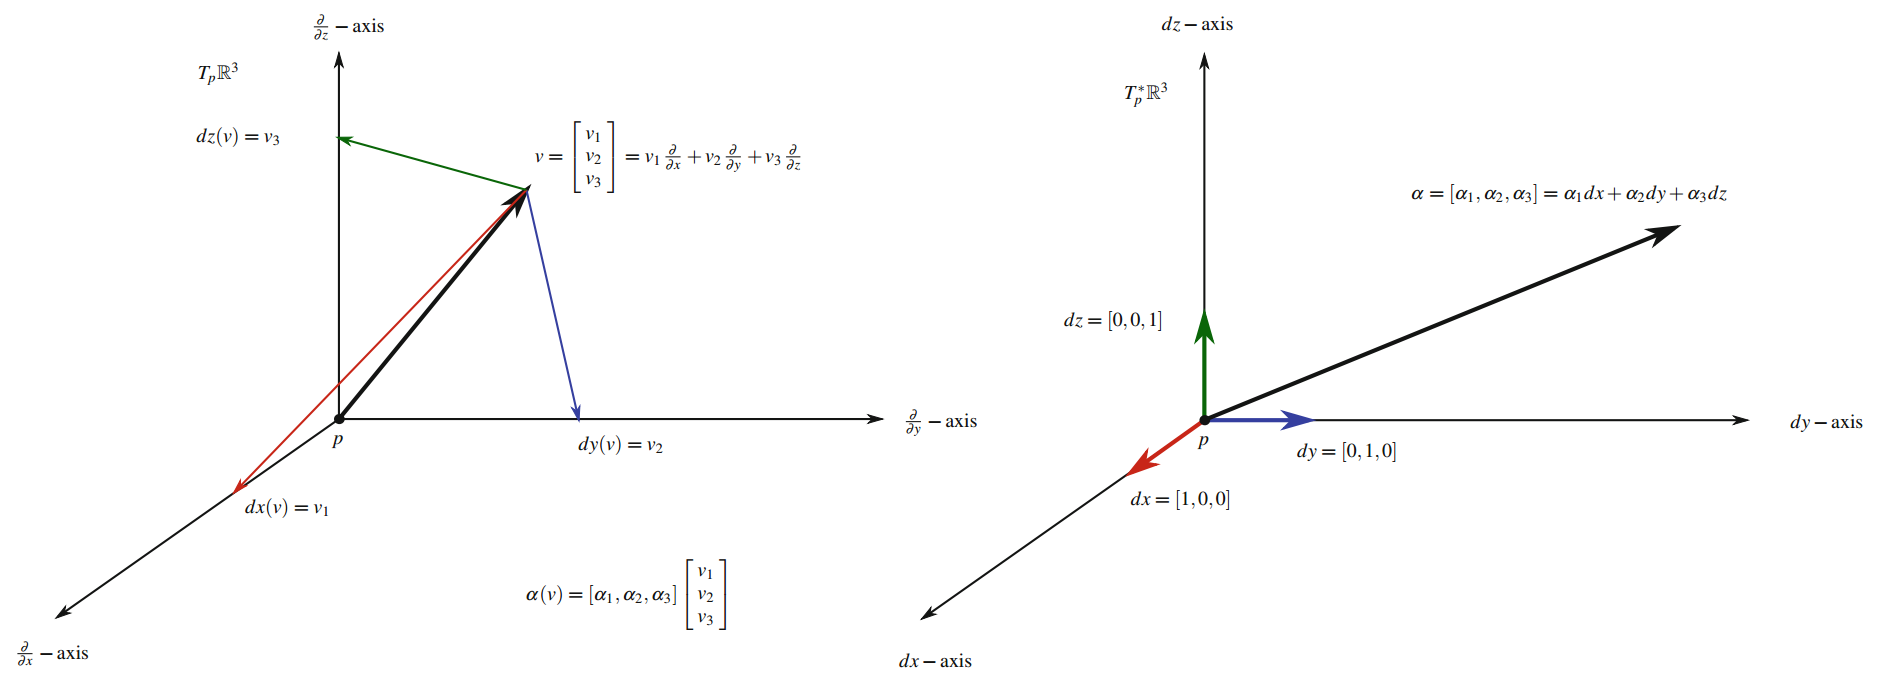

### Two different ways to visualize a differential one-form. As a linear combination of the projections onto the axes of the tangent space TpR^3 (left) or as dual-vectors/ co-vectors / row vectors in the cotangent space 〖Tp〗^* R^3 (right)

### Fortney, J.P. (2018) A Visual Introduction to Differential Forms and Calculus on Manifolds. Cham: Springer International Publishing. Available at: https://doi.org/10.1007/978-3-319-96992-3.


In [205]:
f = Function('f')
s_field = f(R3_r.x, R3_r.y, R3_r.z) # Scalar field to operate on:
s_field

f(x, y, z)

In [220]:
v1 = BaseVectorField(R3_r, 0) # Vector field:
v2 = BaseVectorField(R3_r, 1) # Vector field:
v3 = BaseVectorField(R3_r, 2) # Vector field:
v1

e_x

In [ ]:
v1 = BaseVectorField(R3_r, 0) # Vector field:
v2 = BaseVectorField(R3_r, 1) # Vector field:
v3 = BaseVectorField(R3_r, 2) # Vector field:
pprint(v1 + v2 + v3)

In [207]:
pprint(v1(s_field))

⎛d             ⎞│   
⎜──(f(ξ, y, z))⎟│   
⎝dξ            ⎠│ξ=x


In [208]:
v1(s_field).doit()

Subs(Derivative(f(_xi, y, z), _xi), _xi, x)

In [209]:
pprint(v1(s_field).rcall(p).doit())

∂             
──(f(x, y, z))
∂x            


In [210]:
df = Differential(s_field)
df

d(f(x, y, z))

In [211]:
pprint(df(R3_r.e_x))

⎛d             ⎞│   
⎜──(f(ξ, y, z))⎟│   
⎝dξ            ⎠│ξ=x


In [212]:
pprint(df(R3_r.e_y))

⎛d             ⎞│   
⎜──(f(x, ξ, z))⎟│   
⎝dξ            ⎠│ξ=y


In [213]:
pprint(df(R3_r.e_z))

⎛d             ⎞│   
⎜──(f(x, y, ξ))⎟│   
⎝dξ            ⎠│ξ=z


In [215]:
Differential(df)

0

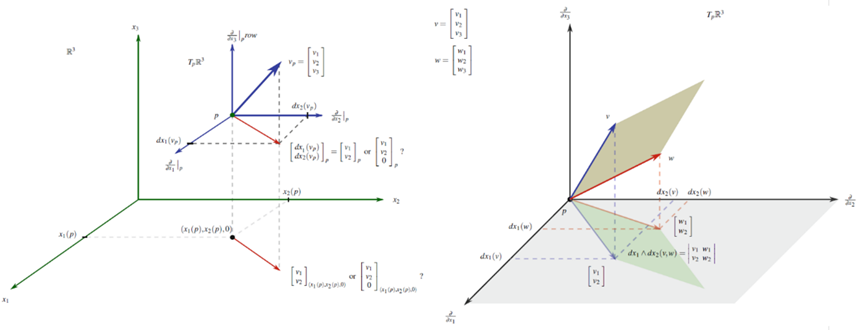

### Projecting on lower dimensions (left). The parallelepiped spanned by v and w (brown) is projected onto the $├ δ/δx_1 ┤|_p ├ δ/δx_2 ┤|_p$ -plane in $T_pR^3$ (right). We want $ d_{x1} ∧ d_{x2} $ to find the volume of this projected area

### Fortney, J.P. (2018) A Visual Introduction to Differential Forms and Calculus on Manifolds. Cham: Springer International Publishing. Available at: https://doi.org/10.1007/978-3-319-96992-3.¶

In [239]:
v1, v2, v3, w1, w2, w3  = symbols('v0:3, w0:3', real=True)
v = v1*R3_r.e_x + v2*R3_r.e_y + v3*R3_r.e_z

v

v0*e_x + v1*e_y + v2*e_z

In [240]:
v.subs(x, 1)
v.subs(y, 2)
v.subs(z, 3)
v

v0*e_x + v1*e_y + v2*e_z

In [241]:
w = w1*R3_r.e_x + w2*R3_r.e_y+ w3*R3_r.e_z
w.subs(x, 4)
w.subs(y, 5)
w.subs(z, 6)
w

w0*e_x + w1*e_y + w2*e_z

In [242]:
wp = WedgeProduct(R2.dx, R2.dy) # dx_1 ∧ dx_2
wp

WedgeProduct(dx, dy)

In [243]:
wp(v, w) # projecting 3D points to 2D

v0*w1 - v1*w0

In [258]:
wp(v, w).evalf(subs={v1: 1, v2: 2, v3: 3, w1: 4, w2: 5, w3: 6}) # this is the determinant as shown in the book, the area formed by the parallelepiped formed by these two vectors as projected on 2D

-3.00000000000000

In [259]:
wp = WedgeProduct(R2.dy, R2.dx) # # dx_2 ∧ dx_1
wp(v, w).evalf(subs={v1: 1, v2: 2, v3: 3, w1: 4, w2: 5, w3: 6}) 

3.00000000000000

In [273]:
wp3 = WedgeProduct(R3_r.dx, R3_r.dy, R3_r.dz)

In [274]:
wp3(v, w)

v0*w1*dz - v1*w0*dz

In [248]:
u1, u2, u3  = symbols('u0:3', real=True)
u = u1*R3_r.e_x + u2*R3_r.e_y + u3*R3_r.e_z
u

u0*e_x + u1*e_y + u2*e_z

In [249]:
wp3(u, v, w)

u0*v1*w2 - u0*v2*w1 - u1*v0*w2 + u1*v2*w0 + u2*v0*w1 - u2*v1*w0

In [276]:
wp3(u, v, w).evalf(subs={u1: 1, u2: 2, u3: 3, v1: 1, v2: 2, v3: 3, w1: 4, w2: 5, w3: 6}) # the volume of the parallelepipeds formed by these three vectors in 3D space

0.e-124

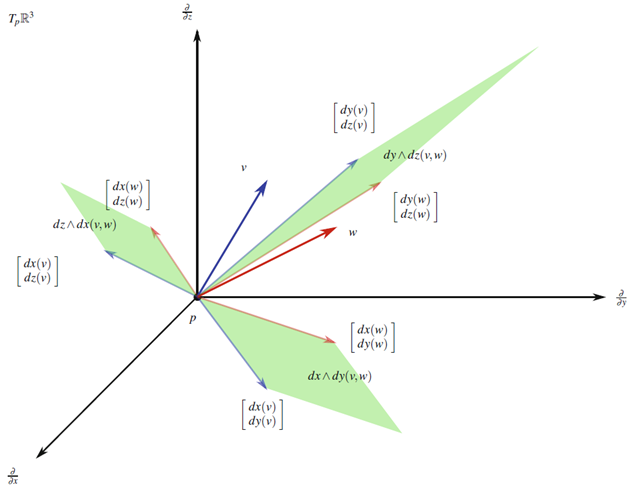

## The action of the two-forms $ dx ∧ dy + dy ∧ dz + dz ∧ dx $ on two vectors v and w, projected on the three planes $ ├ δ/δx┤|_p ├ δ/δy┤|_p-plan, ├ δ/δy┤|_p ├ δ/δz┤|_p-plane, ├ δ/δz┤|_p ├ δ/δx┤|_p-plane $in $ T_pR^3$ , and then summed up

In [261]:
# (dx∧ dy+ dy∧ dz+dz∧ dx)(v,w)=dx∧ dy(v,w)+dy∧ dz(v,w)+dz∧ dx(v,w)
wp_1 = WedgeProduct(R3_r.dx, R3_r.dy)
wp_2 = WedgeProduct(R3_r.dy, R3_r.dz)
wp_3 = WedgeProduct(R3_r.dz, R3_r.dx)
left_expr = wp_l1+wp_l2+wp_l3
left_expr

WedgeProduct(dx, dy) + WedgeProduct(dy, dz) + WedgeProduct(dz, dx)

In [267]:
left_expr(v, w) # This implementation of wedge product does not allow adding tge wedge product then substituting with values

TypeError: 'Add' object is not callable

In [268]:
# doing the right expression
wp_1(v, w)

v0*w1 - v1*w0

In [269]:
wp_2(v, w)

v1*w2 - v2*w1

In [270]:
wp_3(v, w)

-v0*w2 + v2*w0

In [271]:
wp_1(v, w)+wp_2(v, w)+wp_3(v, w) # summing up, this should have been equal to summing up the wedge product basis before applying to the vectors
# not having this ability in sympy, means we can not benefit from the simplification of the bases as explained in the book

v0*w1 - v0*w2 - v1*w0 + v1*w2 + v2*w0 - v2*w1

## 3.2.2.1 Directional Derivatives

In [333]:
f, g, h = symbols('f, g, h', cls=Function) 
f_f = f(R3_r.x, R3_r.y, R3_r.z)
g_f = g(R3_r.x, R3_r.y, R3_r.z)
h_f = h(R3_r.x, R3_r.y, R3_r.z)
f_f

f(x, y, z)

In [325]:
# theoritically speaking, fgh form a new coordinate system, that we could have a jacobian to map it to R^3
# The syntax used in sympy does not allow Forming a coordinate system from functions, as the theoretical math book suggests
# So we can not build the Jacobian using the sympy function below, but we can form its elements one by one and put in a matrix
relation_dict = { ('fgh', 'R3_r'): [(f, g, h), f_f, g_f, h_f] } 
fgh = CoordSystem('fgh', p, (f, g, h), relation_dict)
fgh.jacobian(R3_r)

TypeError: 'f' object is not iterable

In [312]:
theta = f_f*R3_r.dx + g_f*R3_r.dy + h_f*R3_r.dz
theta

f(x, y, z)*dx + g(x, y, z)*dy + h(x, y, z)*dz

In [313]:
dtheta = Differential(theta)
dtheta

d(f(x, y, z)*dx + g(x, y, z)*dy + h(x, y, z)*dz)

In [315]:
df = Differential(f_f)
df

d(f(x, y, z))

In [316]:
dg = Differential(g_f)
dh = Differential(h_f)
dg

d(g(x, y, z))

In [317]:
expr = dtheta - WedgeProduct(df, R3_r.dx) - WedgeProduct(dg, R3_r.dy) - WedgeProduct(dh, R3_r.dz)
expr

d(f(x, y, z)*dx + g(x, y, z)*dy + h(x, y, z)*dz) - WedgeProduct(d(f(x, y, z)), dx) - WedgeProduct(d(g(x, y, z)), dy) - WedgeProduct(d(h(x, y, z)), dz)

In [318]:
s_1 = df(v, w)
s_1 

v0*Subs(Derivative(f(_xi, y, z), _xi), _xi, x) + v1*Subs(Derivative(f(x, _xi, z), _xi), _xi, y) + v2*Subs(Derivative(f(x, y, _xi), _xi), _xi, z) - w0*Subs(Derivative(f(_xi, y, z), _xi), _xi, x) - w1*Subs(Derivative(f(x, _xi, z), _xi), _xi, y) - w2*Subs(Derivative(f(x, y, _xi), _xi), _xi, z)

In [319]:
s_2 = dg(v, w)
s_3 = dh(v, w)
exp = s_1 + s_2 +s_3 
exp

v0*Subs(Derivative(f(_xi, y, z), _xi), _xi, x) + v0*Subs(Derivative(g(_xi, y, z), _xi), _xi, x) + v0*Subs(Derivative(h(_xi, y, z), _xi), _xi, x) + v1*Subs(Derivative(f(x, _xi, z), _xi), _xi, y) + v1*Subs(Derivative(g(x, _xi, z), _xi), _xi, y) + v1*Subs(Derivative(h(x, _xi, z), _xi), _xi, y) + v2*Subs(Derivative(f(x, y, _xi), _xi), _xi, z) + v2*Subs(Derivative(g(x, y, _xi), _xi), _xi, z) + v2*Subs(Derivative(h(x, y, _xi), _xi), _xi, z) - w0*Subs(Derivative(f(_xi, y, z), _xi), _xi, x) - w0*Subs(Derivative(g(_xi, y, z), _xi), _xi, x) - w0*Subs(Derivative(h(_xi, y, z), _xi), _xi, x) - w1*Subs(Derivative(f(x, _xi, z), _xi), _xi, y) - w1*Subs(Derivative(g(x, _xi, z), _xi), _xi, y) - w1*Subs(Derivative(h(x, _xi, z), _xi), _xi, y) - w2*Subs(Derivative(f(x, y, _xi), _xi), _xi, z) - w2*Subs(Derivative(g(x, y, _xi), _xi), _xi, z) - w2*Subs(Derivative(h(x, y, _xi), _xi), _xi, z)

In [307]:
exp.evalf(subs={v1: 1, v2: 2, v3: 3, w1: 4, w2: 5, w3: 6}) 

-3.0*Subs(Derivative(a(_xi, y, z), _xi), _xi, x) - 3.0*Subs(Derivative(a(x, _xi, z), _xi), _xi, y) - 3.0*Subs(Derivative(a(x, y, _xi), _xi), _xi, z) - 3.0*Subs(Derivative(b(_xi, y, z), _xi), _xi, x) - 3.0*Subs(Derivative(b(x, _xi, z), _xi), _xi, y) - 3.0*Subs(Derivative(b(x, y, _xi), _xi), _xi, z) - 3.0*Subs(Derivative(c(_xi, y, z), _xi), _xi, x) - 3.0*Subs(Derivative(c(x, _xi, z), _xi), _xi, y) - 3.0*Subs(Derivative(c(x, y, _xi), _xi), _xi, z)

In [320]:
s_1 = df(u, v, w)
s_2 = dg(u, v, w)
s_3 = dh(u, v, w)
exp = s_1 + s_2 +s_3 
exp

u0*Subs(Derivative(f(_xi, y, z), _xi), _xi, x) + u0*Subs(Derivative(g(_xi, y, z), _xi), _xi, x) + u0*Subs(Derivative(h(_xi, y, z), _xi), _xi, x) + u1*Subs(Derivative(f(x, _xi, z), _xi), _xi, y) + u1*Subs(Derivative(g(x, _xi, z), _xi), _xi, y) + u1*Subs(Derivative(h(x, _xi, z), _xi), _xi, y) + u2*Subs(Derivative(f(x, y, _xi), _xi), _xi, z) + u2*Subs(Derivative(g(x, y, _xi), _xi), _xi, z) + u2*Subs(Derivative(h(x, y, _xi), _xi), _xi, z) - v0*Subs(Derivative(f(_xi, y, z), _xi), _xi, x) - v0*Subs(Derivative(g(_xi, y, z), _xi), _xi, x) - v0*Subs(Derivative(h(_xi, y, z), _xi), _xi, x) - v1*Subs(Derivative(f(x, _xi, z), _xi), _xi, y) - v1*Subs(Derivative(g(x, _xi, z), _xi), _xi, y) - v1*Subs(Derivative(h(x, _xi, z), _xi), _xi, y) - v2*Subs(Derivative(f(x, y, _xi), _xi), _xi, z) - v2*Subs(Derivative(g(x, y, _xi), _xi), _xi, z) - v2*Subs(Derivative(h(x, y, _xi), _xi), _xi, z) + w0*Subs(Derivative(f(_xi, y, z), _xi), _xi, x) + w0*Subs(Derivative(g(_xi, y, z), _xi), _xi, x) + w0*Subs(Derivative(h

In [321]:
exp.evalf(subs={u1: 1, u2: 2, u3: 3, v1: 1, v2: 2, v3: 3, w1: 4, w2: 5, w3: 6})

4.0*Subs(Derivative(f(_xi, y, z), _xi), _xi, x) + 5.0*Subs(Derivative(f(x, _xi, z), _xi), _xi, y) + 6.0*Subs(Derivative(f(x, y, _xi), _xi), _xi, z) + 4.0*Subs(Derivative(g(_xi, y, z), _xi), _xi, x) + 5.0*Subs(Derivative(g(x, _xi, z), _xi), _xi, y) + 6.0*Subs(Derivative(g(x, y, _xi), _xi), _xi, z) + 4.0*Subs(Derivative(h(_xi, y, z), _xi), _xi, x) + 5.0*Subs(Derivative(h(x, _xi, z), _xi), _xi, y) + 6.0*Subs(Derivative(h(x, y, _xi), _xi), _xi, z)

## the directional derivative of a field wrt a Vector

In [340]:
from sympy.vector import CoordSys3D
from sympy.vector import directional_derivative

C = CoordSys3D('C')
directional_derivative(C.x*C.y*C.z, 3*C.i + 4*C.j + C.k)

C.x*C.y + 4*C.x*C.z + 3*C.y*C.z

## Divergence

In [335]:
from sympy.vector import CoordSys3D, divergence

C = CoordSys3D('C')
divergence(C.x*C.y*C.z*(C.i + C.j + C.k))

C.x*C.y + C.x*C.z + C.y*C.z

## Gradient

In [338]:
from sympy.vector import Del

delop = Del() # Represents the vector differential operator, usually represented in mathematical expressions as the 'nabla' symbol.
#it may denote the gradient of a scalar field, the divergence of a vector field, or the curl of a vector field.
delop.gradient(C.x*C.y*C.z).doit()

C.y*C.z*C.i + C.x*C.z*C.j + C.x*C.y*C.k

## Curl 

In [341]:
delop.cross(C.x*C.y*C.z*C.i).doit()

C.x*C.y*C.j + (-C.x*C.z)*C.k

In [342]:
(delop ^ C.x*C.y*C.z*C.i).doit()

C.x*C.y*C.j + (-C.x*C.z)*C.k

In [343]:
from sympy.vector import curl

curl(C.x*C.y*C.z*C.i)

C.x*C.y*C.j + (-C.x*C.z)*C.k

## 3.2.2.3 Tensors on Manifolds/Tensor Transformation Rules

https://docs.sympy.org/latest/modules/tensor/tensor.html
 sympy.tensor.tensor.TensorIndex enable defining contravariant or  covariant tensor indices;
 covariant is represented prepending a - to the index name. Adding - to a covariant (is_up=False) index makes it contravariant.

In [ ]:
# Rank-1 Tensors are either covariant tensors or covariant tensors.
m0, m1, m2, m3 = tensor_indices('m0,m1,m2,m3', Lorentz) # Returns list of tensor indices given their names and their types.

rank1_cov = _IndexStructure.from_indices(m0)
rank1_cov

In [360]:
A = TensorHead('A', [Lorentz])
A

A(Lorentz)

In [361]:
A(m0)

A(m0)

In [356]:
rank1_contra = _IndexStructure.from_indices(-m0)
rank1_contra

_IndexStructure([(m0, 0)], [], [Lorentz])

In [363]:
A(-m0)

A(-m0)

In [358]:
# Rank-2 Tensors Rank-2 tensors, we have three possibilities:
#1. (0, 2)-Tensors (Rank-Two Covariant Tensor): 
rank2_cov = _IndexStructure.from_indices(m0, m1)
rank2_cov

_IndexStructure([(m0, 0), (m1, 1)], [], [Lorentz, Lorentz])

In [364]:
A = TensorHead('A', [Lorentz, Lorentz])
A(m0, m1)

A(m0, m1)

In [359]:
#2. (2, 0)-Tensors (Rank-Two Contravariant Tensor):  
rank2_contra = _IndexStructure.from_indices(-m0, -m1)
rank2_contra

_IndexStructure([(-m0, 0), (-m1, 1)], [], [Lorentz, Lorentz])

In [365]:
A(-m0, -m1)

A(-m0, -m1)

In [366]:
# 3. (1, 1)-Tensors (Mixed-Rank Covariant-Contravariant Tensor): 
rank2 = _IndexStructure.from_indices(-m0, m1)
rank2

_IndexStructure([(-m0, 0), (m1, 1)], [], [Lorentz, Lorentz])

In [367]:
A(-m0, m1)

A(-m0, m1)

In [344]:
# Define a fully antisymmetric tensor of rank 2:
from sympy.tensor.tensor import TensorIndexType, TensorHead, TensorSymmetry

Lorentz = TensorIndexType('Lorentz', dummy_name='L')
asym2 = TensorSymmetry.fully_symmetric(-2)
A = TensorHead('A', [Lorentz, Lorentz], asym2)
A

A(Lorentz,Lorentz)

In [370]:
# Raise or lower indices with the metric g.
from sympy.tensor.tensor import tensor_heads

g = Lorentz.metric
p, q = tensor_heads('p,q', [Lorentz])
p

p(Lorentz)

In [371]:
t = p(m0)*q(m1)*g(-m0, -m1)
t

p(L_0)*q(L_1)*metric(-L_0, -L_1)

In [372]:
t.canon_bp() # Canonicalize using the Butler-Portugal algorithm for canonicalization under monoterm symmetries.

metric(L_0, L_1)*p(-L_0)*q(-L_1)

In [374]:
t.contract_metric(g).canon_bp()

p(L_0)*q(-L_0)

### Given a Riemannian Manifold M and a tensor metric g defined on the tangent space TpM at each point p, this tensor g is the Riemannian metric for this Manifold

sympy.diffgeom.metric_to_Riemann_components(expr)

Return the components of the Riemann tensor expressed in a given basis.

Given a metric it calculates the components of the Riemann tensor in the canonical basis of the coordinate system in which the metric expression is given.


In [379]:
from sympy.diffgeom import metric_to_Riemann_components, TensorProduct
from sympy import exp

TP = TensorProduct
metric_to_Riemann_components(TP(R2.dx, R2.dx) + TP(R2.dy, R2.dy))

[[[[0, 0], [0, 0]], [[0, 0], [0, 0]]], [[[0, 0], [0, 0]], [[0, 0], [0, 0]]]]

In [383]:
non_trivial_metric = exp(2*R2.r)*TP(R2.dr, R2.dr) + R2.r**2*TP(R2.dtheta, R2.dtheta)
non_trivial_metric

exp(2*rho)*TensorProduct(drho, drho) + rho**2*TensorProduct(dtheta, dtheta)

In [384]:
riemann = metric_to_Riemann_components(non_trivial_metric)
riemann

[[[[0, 0], [0, 0]], [[0, exp(-2*rho)*rho], [-exp(-2*rho)*rho, 0]]], [[[0, -1/rho], [1/rho, 0]], [[0, 0], [0, 0]]]]

In [385]:
riemann[0, :, :, :]

[[[0, 0], [0, 0]], [[0, exp(-2*rho)*rho], [-exp(-2*rho)*rho, 0]]]

In [390]:
# Lie derivative with respect to a vector field.
from sympy.diffgeom import (LieDerivative, TensorProduct)

fx, fy = R2_r.base_scalars()
e_x, e_y = R2_r.base_vectors()
dx, dy = R2_r.base_oneforms()

LieDerivative(e_x, fy) # Lie derivative of a vector field e_x in the direction of v at the point p

0

In [387]:
LieDerivative(e_x, fx)

1

In [388]:
LieDerivative(e_x, e_x)

0

In [389]:
LieDerivative(e_x, e_y)

0

In [391]:
LieDerivative(e_x, dx) # Lie derivatives of one-forms 

LieDerivative(e_x, dx)

In [392]:
tp = TensorProduct(dx, dy)
tp

TensorProduct(dx, dy)

In [393]:
LieDerivative(e_x, tp) # Lie derivative of tensors

LieDerivative(e_x, TensorProduct(dx, dy))

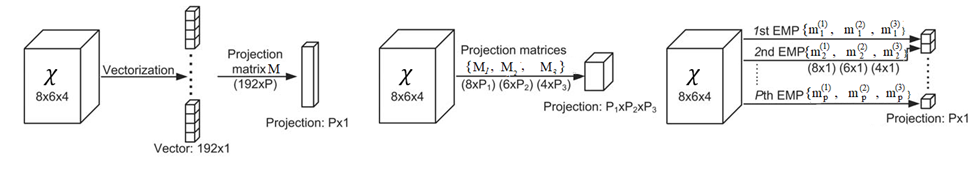

Illustration of (left) vector-to-vector projection, (middle) tensor-to-tensor projection, (right) tensor-to-vector projection (Lu, Plataniotis and Venetsanopoulos, 2011)

## Vector-to-Vector Projection

A linear projection takes a
vector $ x ∈ R^I$ as input and projects it to a vector $y ∈ R^P $ using a projection matrix $ U ∈ R^{I×P} $:

# $y = U^T x = x ×_1 U^T$ .

Lu, H., Plataniotis, K.N. and Venetsanopoulos, A.N. (2014) Multilinear subspace learning: dimensionality reduction of multidimensional data. Boca Raton, Florida: CRC Press/Taylor & Francis Group (Chapman & Hall/CRC machine learning & pattern recognition series).


In [4]:
import numpy as np 
N = 10
P = 4
x = np.array(range(N)) # vector x
U = np.ones((N, N)) # Projection Matrix  , this is all ones, but otherwise, translation, rotation and other linear transformation matrices can be used, such as in coordinate change mapping
y = U*x # VVP: Vector to Vector Projection using a Projection Matrix
y

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [440]:
y.size * P

400

## Tensor-to-Vector Projection

 The third multilinear projection is from a tensor space to a vector space, and
it is called the tensor-to-vector projection (TVP). It is formulated based on
the CANDECOMP/PARAFAC model.

As a vector can be viewed as multiple scalars, the projection from a tensor
to a vector can be viewed as multiple projections, each of which projects a
tensor to a scalar,

In the figure above, the TVP of a tensor $A ∈ R^{8×6×4}$  to a P ×1 vector consists of P projections, each projecting
A to a scalar. Thus, the projection from a tensor to a scalar is the building block for TVP and it is considered first.
A second-order tensor (matrix) $X ∈ R^{I_1×I2}$ can be projected to a scalar y through two unit projection vectors $u^{(1)}$ and $u^{(2)}$ as:

$y = X ×_1 u^{(1)^T} ×_2 u^{(2)^T} = u^{(1)^T} X u^{(2)}, 	\parallel u^{(1)} \parallel =	\parallel u^{(2)} \parallel= 1 $

where $ \parallel .	\parallel$ is the Euclidean norm for vectors. It can be written as the inner product between X and the outer products of $u^{(1)}$ and  $u^{(2)}$ :
$ y = < X, u^{(1)}  u^{(2)^T} > .$

A general tensor $X ∈ R^{I_1×I_2×...×I_N}$ can be projected to a point y through N unit projection vectors ${u^{(1)}, u^{(2)}, ..., u^{(N)}} $, which can also be written as ${u^{(n)}, n = 1, ..., N}$ or simply as ${u^{(n)}}$:

$y = X ×_1 u^{(1)^T} ×_2 u^{(2)^T.}.. ×_N u^{(N)^T}, 	\parallel u^{(n)} \parallel =1$  for n = 1, ..., N.

It can be written as the scalar product of X and the outer product of $u^{(N)}$:

$ y = < X , u^{(1)} ◦ u^{(2)} ◦ ... ◦ u^{(N)} >  $

Denote $U = u^{(1)} ◦ u^{(2)} ◦ ... ◦ u^{(N)} $ , then $y =< X , U >$. This multilinear projection through $u^{(1)} ◦ u^{(2)} ◦ ... ◦ u^{(N)} $ is named as an elementary multilinear projection (EMP), which is a projection of a tensor to a scalar. We call it EMP rather than tensor-to-scalar projection for two reasons. One is that it is used as a building block in TVP. The other is that we want to emphasize that it is an elementary operation.

In [516]:
X = tl.tensor(np.ones(N))
U = tl.tensor(np.ones(N))
U

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [517]:
y = np.zeros(N+N)

y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [519]:
y[0:N] = X
y[N:N+N]= tl.tenalg.mode_dot(U, U, 0)
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10.])

In [520]:
y.size * P

80

###  Tensor-to-Tensor Projection

A tensor-totensor projection (TTP) is formulated based on the Tucker decomposition.
 
A second-order tensor (matrix) X resides in the tensor space denoted as $ R^{I_1} \otimes R^{I_2} $ , which is defined as the
tensor product (outer product) of two vector spaces $R^{I_1}$ and $R^{I_2}$ . For the
projection of a matrix X in a tensor space $ R^{I_1} \otimes R^{I_2} $ to another tensor Y
in a lower-dimensional tensor space $ R^{P_1} \otimes R^{P_2} $ , where $ P_n ≤ I_n$  for n = 1, 2,
two projection matrices $U^{(1)} ∈  R^{I_1} \otimes R^{P_1} $ and $ U^{(2)} ∈  R^{P_2} \otimes R^{I_2} $ (usually with
orthonormal columns) are used so that:

 
$ Y = X ×_1 U^{(1)^T} ×_2 U^{(2)^T}  ...×_N U^{(N)^T} $
for 2-dimensions:

and for higher dimension is extended to:

$Y= X ×_1 U^{(1)^T} ×_2 U^{(2)^T} = U^{(1)^T} XU^{(2)}.$

In [521]:
import tensorly as tl

U = tl.tensor(np.ones((N, N)))
U


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [522]:
y = tl.tenalg.mode_dot(x, U, 0)
y

array([45., 45., 45., 45., 45., 45., 45., 45., 45., 45.])

In [523]:
y.size * P

40

## 3.4.1 CANDECOMP/PARAFAC (CP)

In [37]:
import numpy as np
import tensorly as tl
from tensorly import random
from tensorly.decomposition import CP

U =  random.random_tensor((N, N, N))
CP(U)

Rank-[[[8.96322628e-01 2.69522689e-01 9.13348040e-01 8.14407933e-01
   8.93897586e-01 8.84731843e-02 5.85535857e-01 5.15385876e-02
   5.13680180e-01 3.91002376e-01]
  [6.92121883e-01 2.60639788e-01 7.16565523e-01 6.58123360e-01
   6.37559535e-01 1.66920049e-01 5.28553571e-01 2.19810911e-01
   8.68375153e-02 7.13843678e-01]
  [4.72979972e-01 3.98484827e-01 7.40132874e-01 1.91708220e-01
   9.65593127e-02 6.73759712e-01 1.50159928e-01 2.88844555e-01
   7.68433905e-01 8.88105323e-02]
  [1.17294012e-01 9.66096586e-01 7.40297056e-01 7.41214078e-01
   5.31756263e-01 3.15110840e-01 8.31643418e-01 4.05403164e-02
   8.60489218e-01 3.70371190e-01]
  [4.34259409e-01 8.69550255e-01 2.80976787e-01 8.20033322e-01
   9.16127082e-01 5.23635912e-01 8.31963345e-01 5.09054653e-01
   5.87847109e-01 4.16729964e-01]
  [4.29608623e-01 3.39063470e-01 7.04912227e-02 1.03075861e-01
   3.03546245e-01 1.33541109e-01 8.58625151e-01 2.05103367e-01
   2.09387599e-03 3.13498565e-02]
  [5.39029910e-01 6.05558485e-02 6.

In [45]:
rank = N/2
cp = CP(rank=rank) # with reduced rank, half compression
weights, factors = cp.fit_transform(U)
len(weights)

167

In [46]:
len(factors)

3

In [47]:
[f.shape for f in factors]

[(10, 167), (10, 167), (10, 167)]

In [48]:
[f.shape for f in factors]

[(10, 167), (10, 167), (10, 167)]

In [49]:
import math
reconstruction_t = tl.cp_to_tensor((weights, factors))

CP_RMSE = math.sqrt(np.square(np.subtract(U,reconstruction_t)).mean() )
print ("CP RMSE  for rank " + str(rank) + " RMSE = ", CP_RMSE)

CP RMSE  5.0 RMSE =  7.901767578266349e-12


In [50]:
rank = int(N/3)
cp = CP(rank=rank) # with higher compression
weights, factors = cp.fit_transform(U)
reconstruction_t = tl.cp_to_tensor((weights, factors))

CP_RMSE = math.sqrt(np.square(np.subtract(U,reconstruction_t)).mean() )
print ("CP RMSE  for rank " + str(rank) + " RMSE = ", CP_RMSE) # higher error

CP RMSE  for rank 3 RMSE =  0.26290491409317884


## 3.4.2 Tucker Decomposition

In [55]:
from tensorly.decomposition import tucker

rank=[N/2, N/2, N/2]
core, factors = tucker(U, rank=rank)# half compression
core.shape

(5, 5, 5)

In [54]:
[f.shape for f in factors]

[(10, 5), (10, 5), (10, 5)]

In [57]:
regeneratedTucker_tensor = tl.tucker_to_tensor((core, factors))
print(regeneratedTucker_tensor.shape)
Tucker_RMSE =math.sqrt(np.square(np.subtract(U, regeneratedTucker_tensor).mean()))
print ("Tucker   for rank " + str(rank) + " RMSE = ", Tucker_RMSE) 

(10, 10, 10)
Tucker   for rank [5.0, 5.0, 5.0] RMSE =  6.907312834043555e-06


In [58]:
rank=[int(N/3), int(N/3), int(N/2)]
core, factors = tucker(U, rank=rank)# more compression
regeneratedTucker_tensor = tl.tucker_to_tensor((core, factors))
print(regeneratedTucker_tensor.shape)
Tucker_RMSE =math.sqrt(np.square(np.subtract(U, regeneratedTucker_tensor).mean()))
print ("Tucker   for rank " + str(rank) + " RMSE = ", Tucker_RMSE) # higher error

(10, 10, 10)
Tucker   for rank [3, 3, 5] RMSE =  1.4885976787223143e-05


##  Relativity and Geometry
### Special relativity is encoded in the geometry of Minkowski space 
From https://www.kaggle.com/code/josemrv/bhs-collision-part1/notebook
    

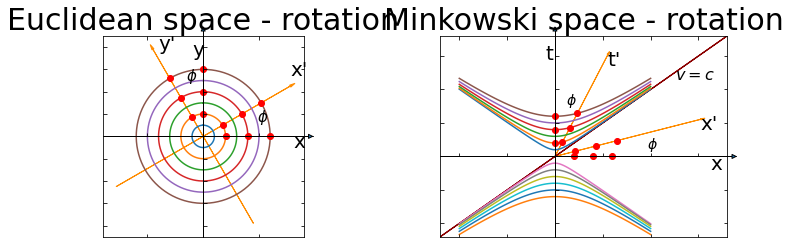

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from mpl_toolkits.axisartist.axislines import AxesZero

## A plot with physics --
x = np.array([0.,0.,0.,0.,0.,0.])
y = np.array([0.,0.,0.,0.,0.,0.])
r = np.array([0.1,0.2,0.3,0.4,0.5,0.6])

phi = np.linspace(0.0,2*np.pi,100)
na=np.newaxis


# the first axis of these arrays varies the angle, 
# the second varies the circles
x_line = x[na,:]+r[na,:]*np.sin(phi[:,na])
y_line = y[na,:]+r[na,:]*np.cos(phi[:,na])

### For the Hyperbolas -t^2 + x^2 = -b^2
bp=[0.1,0.2,0.3,0.4,0.5,0.6]
x_paraB1 = np.linspace(-1,1,100)

x_paraB = np.transpose([x_paraB1 for tk in bp])
t_paraB = np.transpose([np.sqrt(x_paraB1**2 + tk**2) for tk in bp])
t_paraBN = - t_paraB
#
    
 
fig = plt.figure(figsize = (25, 17))
ax = fig.add_subplot(4,1,1, axes_class=AxesZero, aspect=0.7)


## Some Transformation
base = plt.gca().transData

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)


## Square of the plot 
xl,xh = -1.2, 1.8
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)

## The Hyperbolas,
plt.plot(x_paraB, t_paraB,'-')
plt.plot(x_paraB, t_paraBN,'-')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)


## Rotated y axe
angle_t = -20
rot_t = transforms.Affine2D().rotate_deg(angle_t)
x_tail = 0.
y_tail = 0.
y_head = yh*0.9
x_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.02, 
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot_t + base) #
## Some points (y axe)
xhAb=np.array([0.2, 0.4, 0.6])
plt.plot([0,0,0],xhAb,'ro')
## SR theory
t1=(1/np.sqrt(1-np.tan(angle_t*np.pi/(180))**2))*xhAb  # (1/pow(1-pow(np.tan(-20*np.pi/(180)),2),1/2))*0.3
x1=np.sqrt(-xhAb**2 + t1**2)                           # pow(-pow(0.3,2)+pow(t1,2),1/2)
##
plt.plot(x1,t1,'ro')


## Rotated x axe
angle_x = (-1)*angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
y_tail = 0.
x_tail = 0.
x_head = xh*0.9
y_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.02, 
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot_x + base
        )
## Some points (x axe)
plt.plot(xhAb,[0,0,0],'ro')
## SR theory (switch  [t <-> x] )
plt.plot(t1,x1,'ro')

# Rotated t' and x'
plt.annotate('x\'',(0.9*xh*np.cos(angle_x*np.pi/(180)), 0.65*xh*np.sin(angle_x*np.pi/(180))),  fontsize=20)
plt.annotate('t\'',(0.9*xh*np.cos(np.pi/2-angle_x*np.pi/(180)), 0.8*xh*np.sin(np.pi/2-angle_x*np.pi/(180))),  fontsize=20)
# Ploting t,x --
plt.annotate("x",(0.9*xh, -0.2),  fontsize=20)
plt.annotate("t",(-0.1, 0.8*yh),  fontsize=20)


# angle text
t1=t1[-1]
x1=x1[-1]
###
plt.annotate('$\phi$',(x1*0.5,t1*1.2),  fontsize=14)
#
plt.annotate('$\phi$',(t1*1.5,x1*0.5),  fontsize=14)


## One thick red line for v=c
angle_c = 45
rot_c = transforms.Affine2D().rotate_deg(angle_c)
y_tail = 0.
x_tail = 2*xl
x_head = xh*2.
y_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
ax.arrow(x_tail, y_tail, x_head+dx, y_head+dy, head_width=0.02, lw=1.2,
         head_length=0.05, fc='darkred', ec='darkred', transform= rot_c + base
        )
# SR theory v = c 
plt.annotate('$v=c$',(xh*0.7,yh*0.64),  fontsize=16)
######################################################################################

## A Title
plt.title("Minkowski space - rotation",  fontsize=30)

#################################################################################################
###################### Segunda figura ...
#################################################################################################
ax = fig.add_subplot(4,2,1, axes_class=AxesZero, aspect=1)

## Some Transformation
angle_rot=30
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(angle_rot)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

## Square o the plot 
xl,xh = -.9, .9
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)

## The circles,
plt.plot(x_line,y_line,'-')



## Some points (y axe)
xhAb=np.array([0.2, 0.4, 0.6])
plt.plot([0,0,0],xhAb,'ro')
plt.plot([0,0,0],xhAb,'ro' , transform= rot + base)
## Some points (x axe)
plt.plot(xhAb,[0,0,0],'ro')
plt.plot(xhAb,[0,0,0],'ro' , transform= rot + base)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)

## Rotated y axe
x_tail = 0.
y_tail = yl
x_head = 0.
y_head = yh*0.5
dx = x_head - x_tail
dy = y_head - y_tail
ax.arrow(x_tail, y_tail, x_head+dx, y_head+dy, head_width=0.02, 
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot + base
        )
## Rotated x axe
y_tail = 0.
x_tail = xl
y_head = 0.
x_head = xh*0.5
dx = x_head - x_tail 
dy = y_head - y_tail
ax.arrow(x_tail, y_tail, x_head+dx, y_head+dy, head_width=0.02, 
         head_length=0.05, fc='darkorange', ec='darkorange',  transform= rot + base
        )
# Rotated angles
plt.annotate("x",(0.9*xh, -0.1),  fontsize=20)
plt.annotate("y",(-0.1, 0.8*yh),  fontsize=20)
plt.annotate('x\'',(xh*np.cos(angle_rot*np.pi/(180)), 1.2*xh*np.sin(angle_rot*np.pi/(180))),  fontsize=20)
plt.annotate('y\'',(0.9*xh*np.cos(np.pi/2+angle_rot*np.pi/(180)), xh*np.sin(np.pi/2+angle_rot*np.pi/(180))),  fontsize=20)

# angle text
#t1=xhAb[-1]*np.sin(angle_rot*np.pi/(180))
#x1=0.3*xhAb[-1]*np.cos(angle_rot*np.pi/(180))
plt.annotate('$\phi$',(-0.15,0.5),  fontsize=15)
plt.annotate('$\phi$',(0.48,0.13),  fontsize=15)

## A Title
plt.title("Euclidean space - rotation",  fontsize=30)

#plt.legend()
plt.show()

In [79]:
%matplotlib inline

# General imports
from itertools import product
import matplotlib
#import numba
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Basic imports and functions
from sympy import latex, symbols, sin, cos, pi, simplify, lambdify, Matrix
from scipy.integrate import solve_ivp

from sympy.diffgeom import (
    Manifold,
    Patch,
    CoordSystem,
    metric_to_Christoffel_2nd,
    TensorProduct as TP
)

def lprint(v):
    display(Math(latex(v)))

In [80]:
# Create a manifold.
M = Manifold('M', 4)

# Create a patch.
patch = Patch('P', M)

# Basic symbols
c, acc = symbols('c acc')

# Coordinate system
cartes_coord = CoordSystem('cartesian', patch, ['t', 'x', 'y', 'z'])

# Get the coordinate functions
t, x, y, z = cartes_coord.coord_functions()

# Get the base one forms.
dt, dx, dy, dz = cartes_coord.base_oneforms()

# Auxiliar terms for the metric.
dt_2 = TP(dt, dt)
dx_2 = TP(dx, dx)
dy_2 = TP(dy, dy)
dz_2 = TP(dz, dz)
factor = (1 + 2*acc*z / c**2)

# Build the metric
metric = -factor * c ** 2 * dt_2 + dx_2 + dy_2 + dz_2

# Get the Christoffel symbols of the second kind.
christoffel = metric_to_Christoffel_2nd(metric)
# Let's print this in an elegant way ;)
for i, j, k in product(range(4), range(4), range(4)):
    if christoffel[i, j, k] != 0:
        display(Math(f'\Gamma^{i}_{{{j},{k}}} = ' + latex(christoffel[i, j, k])))

C:\ProgramData\Anaconda3\lib\site-packages\sympy\diffgeom\diffgeom.py:300: SymPyDeprecationWarning: 

Passing str as coordinate symbol's name has been deprecated since
SymPy 1.7. Use Symbol which contains the name and assumption for
coordinate symbol instead. See
https://github.com/sympy/sympy/issues/19321 for more info.

  SymPyDeprecationWarning(


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [82]:
def doall(EqTitle,OneEq,locEq=0.2,FC="white"):
    # Colors used in Matplotlib online documentation.
    mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)
    mpl_orange_rvb = (202. / 255., 121. / 256., 0. / 255.)
    mpl_grey_rvb = (51. / 255., 51. / 255., 51. / 255.)

    # Creating figure and axis.
    plt.figure(figsize=(7, 0.8))
    plt.axes([0.01, 0.01, 0.98, 0.90], facecolor=FC, frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title(EqTitle,
                        color=mpl_grey_rvb, fontsize=24, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Plotting formula
    plt.annotate(OneEq,
                 xy=(locEq,0.3),
                 color=mpl_orange_rvb, ha='center', fontsize=35)
    plt.show()

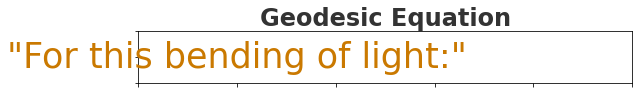

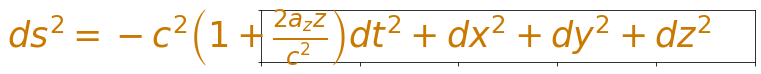

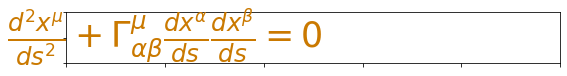

In [83]:
## Here we write the Eq.
myEq1={1: "\"For this bending of light:\"",
       2: 
    r"$ds^2 = -c^2 \left(1+\frac{2a_z z}{c^2}  \right) dt^2 + dx^2 +dy^2 +dz^2$",
       3: 
    r"$\frac{d^2x^{\mu}}{ds^2} + \Gamma^{\mu}_{\alpha\beta}  \frac{dx^{\alpha}}{ds} \frac{dx^{\beta}}{ds} = 0 $"
}
#
myTitle='Geodesic Equation'    
## Here we plot it 
doall(myTitle,myEq1[1])
doall("",myEq1[2])
doall("",myEq1[3])

In [84]:
g_func = lambdify((c, acc, z), christoffel, modules='numpy')

## Specify c and r_s
def F(t, y):
    u = np.array(y[0:4])
    v = np.array(y[4:8])

    chris = g_func(1, 1, u[3])

    du = v
    dv = -np.dot(np.dot(chris, v), v)

    return np.concatenate((du, dv))

In [85]:
T = 60
pos_init=[0.001, 0.3, 0.1, 6.]
vel_init=[0.55, (1), 0., 0.]
## The solver --
sol_Bend_of_light = solve_ivp(F, [0, T], (pos_init+vel_init), t_eval=np.linspace(0, T, int(T * 123 + 1)))

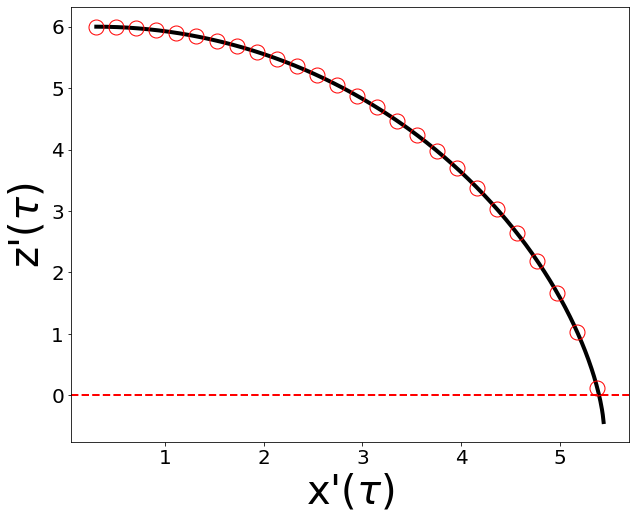

In [86]:
# Variables to plot
zplot=sol_Bend_of_light.y[3]
xplot=sol_Bend_of_light.y[1]

# New figure
fig=plt.figure(figsize=(10, 8),)
ax = fig.subplots(1, 1,  sharex=True, sharey=True)

# Extract solution 
plt.plot(xplot, zplot, lw=4., c='k')
plt.plot(xplot[::25], zplot[::25], 'ro', fillstyle='none', markersize=15)

ax = plt.gca()

ax.axhline(0, color="red", ls='--', lw=2)

#plt.grid()
plt.xlabel(r"x'($\tau$)",fontsize=40)
plt.xticks(fontsize=20)
plt.ylabel(r"z'($\tau$)",fontsize=40)
plt.yticks(fontsize=20)

## Borders
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

plt.show()

## This indeed confirms that photons do follow parabolic paths in the x-z spacetime plane. 

## Riemannian Geometry and Geodesics

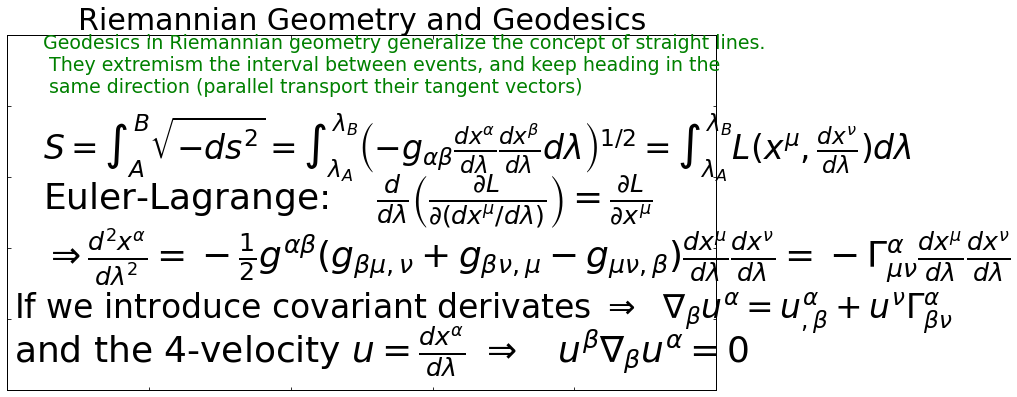

In [88]:
fig = plt.figure(figsize = (20, 30))
ax = fig.add_subplot(4,1,1, axes_class=AxesZero, aspect=0.5)

## Square of the plot 
xl,xh = 0., 1.
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)


########################################################################################
########################################################################################
########
y1=0.84
x1=0.05
ax.annotate("Geodesics in Riemannian geometry generalize the concept of straight lines. \n \
They extremism the interval between events, and keep heading in the \n \
same direction (parallel transport their tangent vectors)",
            (x1,y1),   fontsize=19, color='g'
            )

## Notes
y1=0.65
x1=0.05
ax.annotate(r"$S = \int^B_A {\sqrt{-ds^2}} ="
r"\int^{\lambda_B}_{\lambda_A} \left( -g_{\alpha\beta} \frac{dx^{\alpha}}{d\lambda} \frac{dx^{\beta}}{d\lambda} d\lambda \right)^{1/2}="
            r"\int^{\lambda_B}_{\lambda_A} L (x^{\mu}, \frac{dx^{\nu}}{d\lambda})d\lambda$", 
            (x1,y1),   fontsize=33,
            )

## Notes
y1=0.51
x1=0.05
ax.annotate(r"Euler-Lagrange:    "
            r"$ \frac{d}{d\lambda} \left(  \frac{\partial L}{\partial(dx^{\mu}/d\lambda) }   \right)="
            r"  \frac{\partial L}{\partial x^{\mu} }  $", 
            (x1,y1),   fontsize=36,
            )


## Notes
y1=0.35
x1=0.05
ax.annotate(r"$\Rightarrow  \frac{d^2x^{\alpha}}{d\lambda^2} ="
            r"-\frac{1}{2}g^{\alpha\beta} ( g_{\beta\mu,\nu} + g_{\beta\nu,\mu}  - g_{\mu\nu,\beta} ) \frac{dx^{\mu}}{d\lambda}\frac{dx^{\nu}}{d\lambda}="
            r"-\Gamma^{\alpha}_{\mu\nu}  \frac{dx^{\mu}}{d\lambda} \frac{dx^{\nu}}{d\lambda}$", 
            (x1,y1),   fontsize=36,
            )

## Notes
y1=0.2
x1=0.01
ax.annotate(r"If we introduce covariant derivates $\Rightarrow$  "
            r"$\nabla_{\beta} u^{\alpha} = u_{,\beta}^{\alpha} + u^{\nu}\Gamma_{\beta\nu}^{\alpha}$",
            (x1,y1),   fontsize=33,
            )

## Notes
y1=0.08
x1=0.01
ax.annotate(    
            r"and the 4-velocity $u=\frac{dx^{\alpha}}{d\lambda}$"
            r" $\Rightarrow$   $u^{\beta}  \nabla_{\beta} u^{\alpha}=0 $", 
            (x1,y1),   fontsize=36,
            )

######  End Notes ...
########################################################################################
plt.title("Riemannian Geometry and Geodesics",  fontsize=30)



plt.show()